Modulo de Plotly y Cutfflink para analisis de Datos
Visualizacion Iteractiva
#conda install plotly
#pip install plotly

In [2]:
import pandas as pd 
import numpy as np

In [4]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [5]:
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline
dataframe = pd.DataFrame(np.random.randn(100,4), columns=["a","b","c","d"])
dataframe

,a,b,c,d
0,-0.347525,2.168521,0.881489,1.493799
1,-0.621529,1.113665,1.623932,-0.379682
2,-0.108530,-0.305708,0.557434,0.929107
3,-0.203674,0.961096,0.345836,0.143262
4,1.115895,0.563821,0.840331,-0.149508
...,...,...,...,...
95,-0.144128,-0.519504,-1.394573,-1.674085
96,0.900107,-0.703818,-1.140790,0.158282
97,0.481486,-1.480777,0.324827,0.592907
98,1.374007,0.012901,-0.107501,-0.439424


<Axes: >

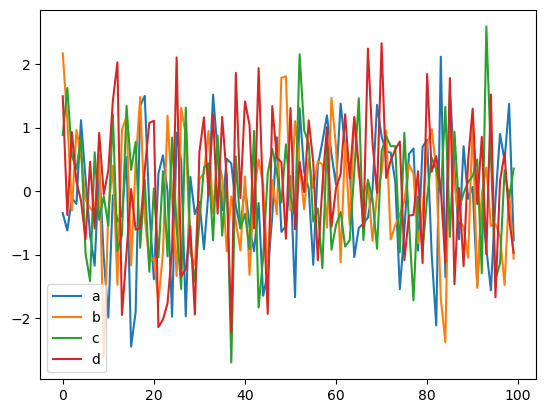

In [6]:
dataframe.plot()

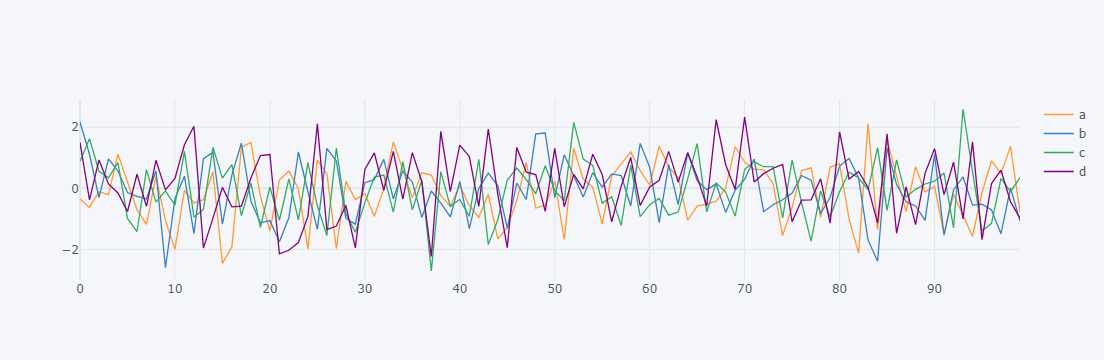

In [10]:
dataframe.iplot()

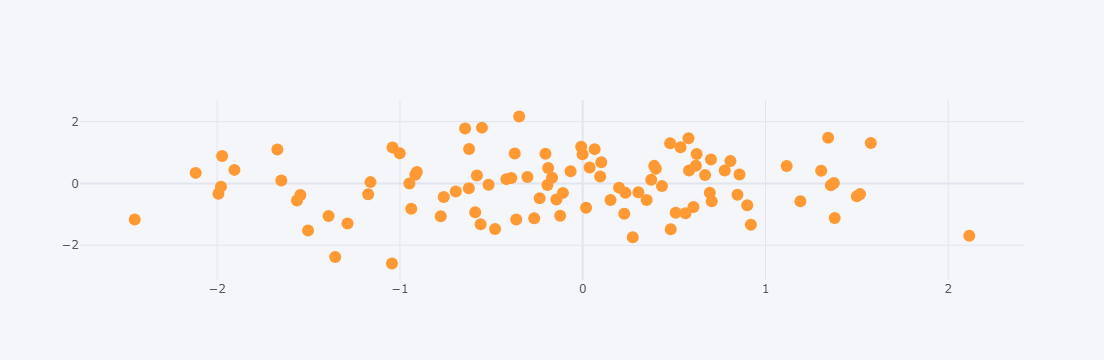

In [12]:
dataframe.iplot(kind="scatter", x="a", y="b", mode="markers")

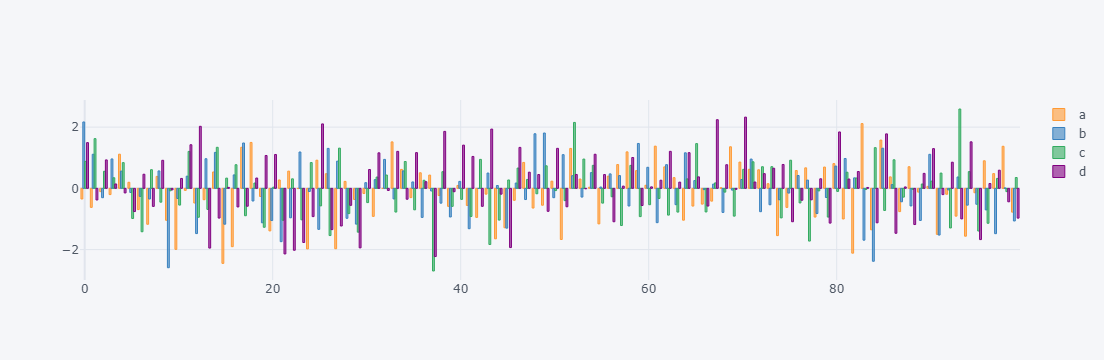

In [14]:
dataframe.iplot(kind="bar")

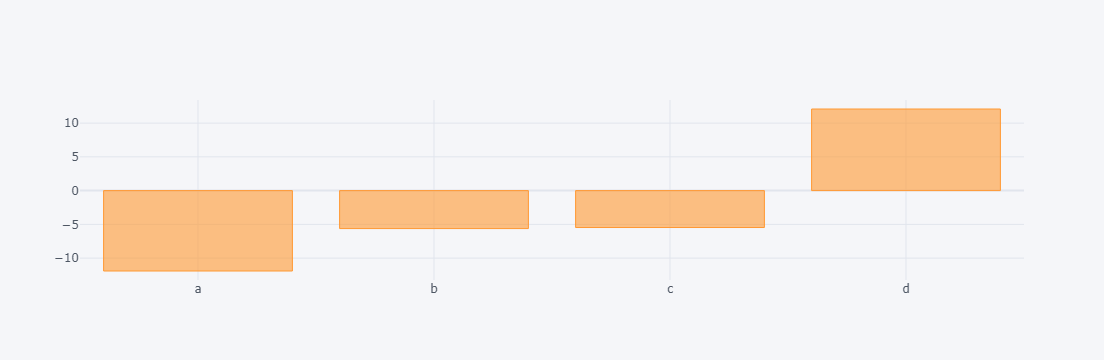

In [16]:
dataframe.sum().iplot(kind="bar")

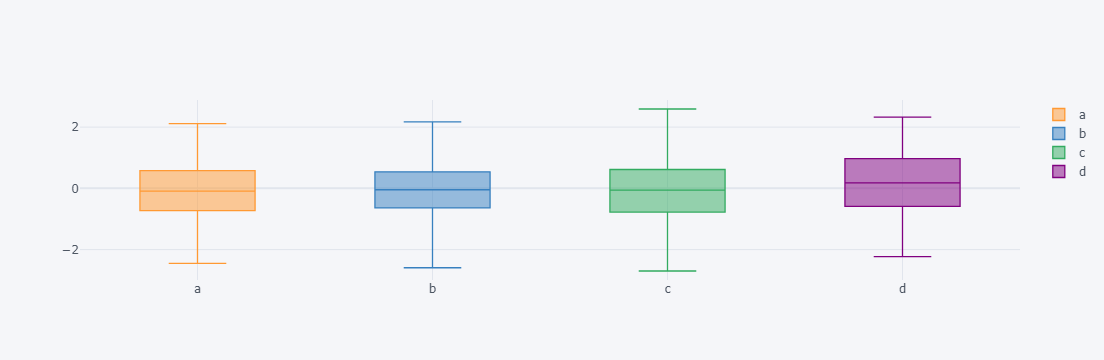

In [18]:
dataframe.iplot(kind="box")

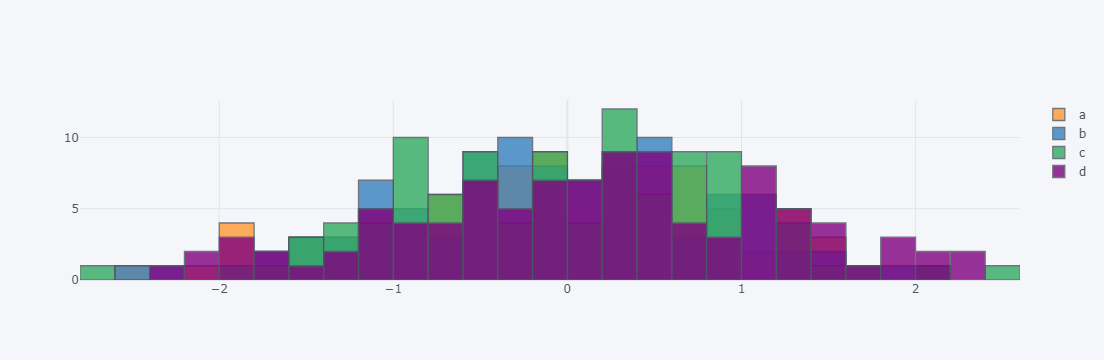

In [20]:
dataframe.iplot(kind="hist", bins=30)

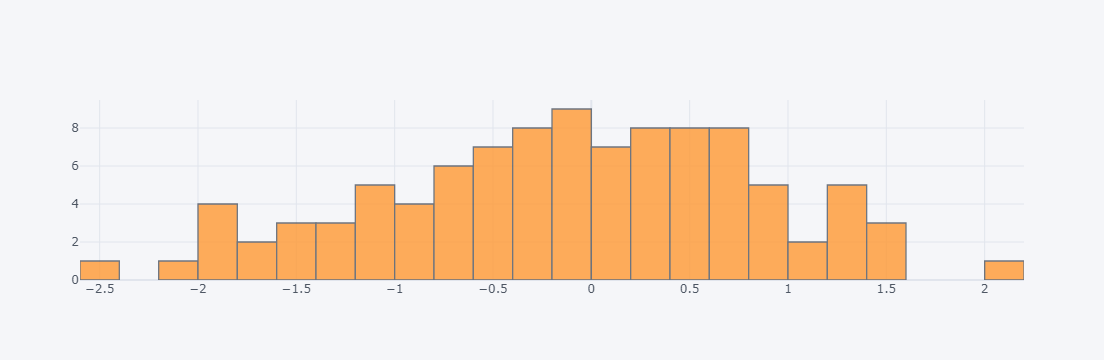

In [22]:
dataframe["a"].iplot(kind="hist", bins=30)

In [103]:
#Error ocurre porque cufflinks está intentando usar pd.np, un atributo de pandas que ya no existe en versiones recientes
dataframe[["a","b"]].iplot(kind="spread") 

C:\Users\roman\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:848: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



AttributeError: module 'pandas' has no attribute 'np'

In [24]:
#Error ocurre porque cufflinks está intentando usar pd.np, un atributo de pandas que ya no existe en versiones recientes
import cufflinks as cf
import numpy as np
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)
cf.go_offline()

# Crea un DataFrame de ejemplo
import pandas as pd
df = pd.DataFrame({
    "a": np.random.randn(100).cumsum(),
    "b": np.random.randn(100).cumsum()
})

# Grafica utilizando iplot de cufflinks
df[["a", "b"]].iplot(kind="spread")

C:\Users\roman\anaconda3\Lib\site-packages\cufflinks\plotlytools.py:848: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



AttributeError: module 'pandas' has no attribute 'np'

Para hacer que este código sea compatible con las versiones recientes de pandas y cufflinks, necesitamos una forma alternativa de implementar la función spread sin utilizar pd.np, que ya no es compatible.

Podemos reescribir el código para calcular la "spread" (diferencia entre las columnas "a" y "b") manualmente, sin depender de cufflinks para este tipo de cálculo.

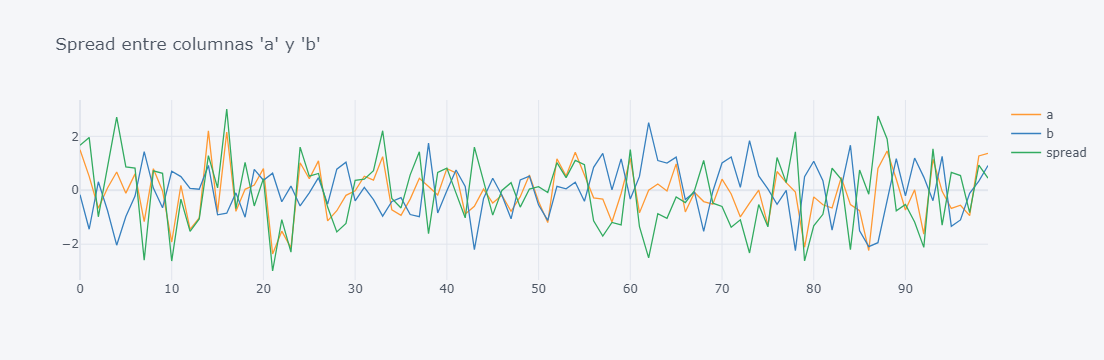

In [31]:
import pandas as pd
import numpy as np
import cufflinks as cf
from plotly.offline import init_notebook_mode

# Inicializamos el modo offline de Plotly
init_notebook_mode(connected=True)
cf.go_offline()

# Generamos los datos
dataframe = pd.DataFrame(np.random.randn(100, 4), columns=["a", "b", "c", "d"])

# Calculamos la diferencia entre las columnas 'a' y 'b'
dataframe['spread'] = dataframe['a'] - dataframe['b']

# Usamos iplot para graficar las columnas 'spread', 'a', y 'b'
dataframe[['a', 'b', 'spread']].iplot(title="Spread entre columnas 'a' y 'b'", kind='line')

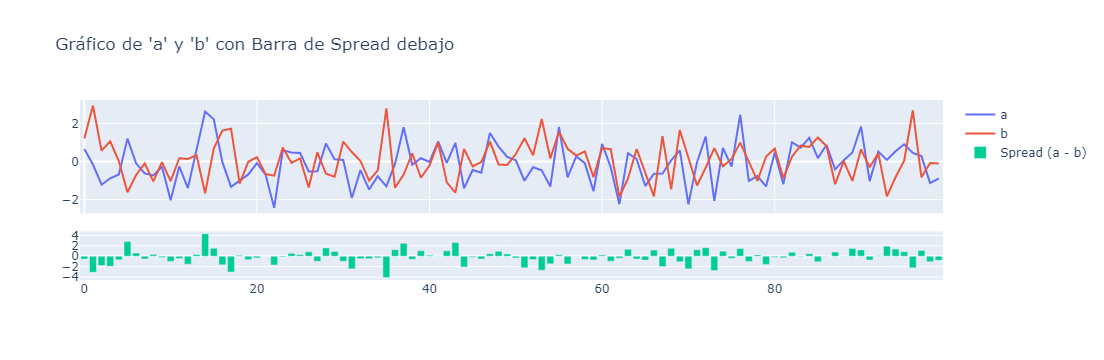

In [35]:
#Conseguir mas o menos el mismo resultado de spread
import pandas as pd
import numpy as np
import cufflinks as cf
from plotly.offline import init_notebook_mode
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Inicializamos el modo offline de Plotly
init_notebook_mode(connected=True)
cf.go_offline()

# Generamos los datos
dataframe = pd.DataFrame(np.random.randn(100, 4), columns=["a", "b", "c", "d"])

# Calculamos la diferencia entre las columnas 'a' y 'b' (spread)
dataframe['spread'] = dataframe['a'] - dataframe['b']

# Creamos un subplot con dos filas: una para las líneas y otra para el spread en barra
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_heights=[0.7, 0.3], vertical_spacing=0.1)

# Añadimos las líneas de 'a' y 'b' en la primera fila
fig.add_trace(go.Scatter(x=dataframe.index, y=dataframe['a'], mode='lines', name='a'), row=1, col=1)
fig.add_trace(go.Scatter(x=dataframe.index, y=dataframe['b'], mode='lines', name='b'), row=1, col=1)

# Añadimos la barra del spread en la segunda fila
fig.add_trace(go.Bar(x=dataframe.index, y=dataframe['spread'], name='Spread (a - b)'), row=2, col=1)

# Configuramos el diseño del gráfico
fig.update_layout(title="Gráfico de 'a' y 'b' con Barra de Spread debajo", showlegend=True)

# Mostramos el gráfico
fig.show()

Explicación
Subgráficos (make_subplots): Usamos make_subplots con dos filas. La primera fila muestra las líneas de las columnas a y b, y la segunda muestra el "spread" en forma de barras.
Ajuste de altura: row_heights=[0.7, 0.3] ajusta las proporciones de cada fila.
Barras de spread: Se utiliza go.Bar para representar la columna spread como una barra en la segunda fila, lo que proporciona una representación visual clara de la diferencia entre a y b.
Este diseño debería darte una visualización más organizada y atractiva.

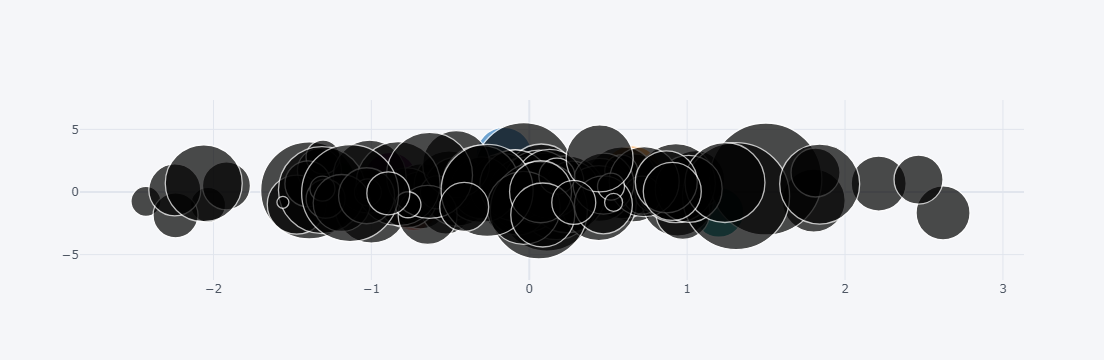

In [41]:
dataframe.iplot(kind="bubble", x="a", y="b", size="c") 

In [43]:
dataframe2 = pd.DataFrame({"a":[1,2,3,4],"b":[30,40,20,10], "c":[12,16,18,15]})
dataframe2

,a,b,c
0,1,30,12
1,2,40,16
2,3,20,18
3,4,10,15


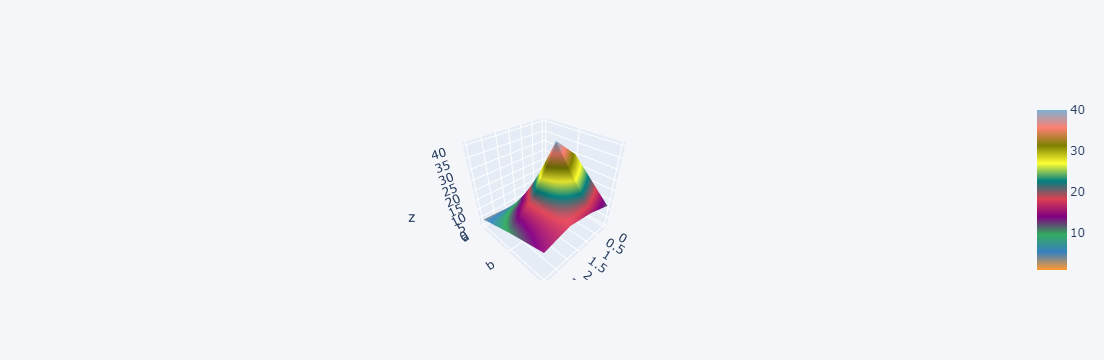

In [45]:
dataframe2.iplot(kind="surface") 